In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv(r'/content/Toddler Autism dataset July 2018.csv')
df_2 = pd.read_csv(r'/content/autism_screening.csv')
df_3 = pd.read_csv(r'/content/data_csv.csv')
df_4 = pd.read_csv(r'/content/Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv')
df_5 = pd.read_csv(r'/content/autism_dataset (1).csv')

In [3]:
df_5.columns
df_5.drop(columns=["ID","ethnicity","jaundice","used_app_before","result","age_desc","contry_of_res"],inplace=True)
df_5 = df_5.rename(columns={
    'A1_Score':'A1', 'A2_Score':'A2', 'A3_Score':'A3', 'A4_Score':'A4', 'A5_Score':'A5',
       'A6_Score':'A6', 'A7_Score':'A7', 'A8_Score':'A8', 'A9_Score':'A9', 'A10_Score':'A10','gender':'Sex',
    'age':'Age','relation':'Who completed the test','austim':'Family_mem_with_ASD','Class/ASD':'Class'

})

In [4]:
df_1.columns
df_4.columns
df_3.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [5]:
df_1.drop(columns = ["Case_No","Qchat-10-Score","Ethnicity","Jaundice"],inplace=True)
df_4.drop(columns=["Region","Screening Score"],inplace=True)
df_3.drop(columns=["CASE_NO_PATIENT'S","Social_Responsiveness_Scale","Qchat_10_Score","Speech Delay/Language Disorder",
                  "Learning disorder","Genetic_Disorders","Depression","Global developmental delay/intellectual disability",
                  "Social/Behavioural Issues","Childhood Autism Rating Scale","Anxiety_disorder","Ethnicity","Jaundice"],inplace=True)

In [6]:
df_4 = df_4.rename(columns={
    'Family member with ASD history': 'Family_mem_with_ASD',
    'Who is completing the test': 'Who completed the test',
    'Gender':'Sex'
})
df_1 = df_1.rename(columns = {'Age_Mons':'Age',"Class/ASD Traits ":"Class"})
df_3 = df_3.rename(columns={
    'A10_Autism_Spectrum_Quotient': 'A10',
    'ASD_traits': 'Class',
    'Age_Years':'Age',
    'Who_completed_the_test': 'Who completed the test'
})

In [7]:
df = df_4[df_1.columns]

# Concatenate the two DataFrames
df = pd.concat([df_1, df_4], ignore_index=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,f,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,yes,family member,Yes


In [8]:
df["Age"] = df["Age"]//12
df["Age"]

,Age
0,2
1,3
2,3
3,2
4,1
...,...
1555,2
1556,2
1557,2
1558,1


In [9]:
df = pd.concat([df_3, df], ignore_index=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,2,F,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,M,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,M,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,M,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,F,No,Family Member,Yes


In [10]:
df = pd.concat([df_5, df], ignore_index=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Family_mem_with_ASD,Who completed the test,Class
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,no,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,no,Self,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,yes,Self,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,no,Self,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,no,Self,0


In [11]:
df = df[df["Age"]<=5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 216 to 4344
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1                      1988 non-null   int64  
 1   A2                      1988 non-null   int64  
 2   A3                      1988 non-null   int64  
 3   A4                      1988 non-null   int64  
 4   A5                      1988 non-null   int64  
 5   A6                      1988 non-null   int64  
 6   A7                      1988 non-null   int64  
 7   A8                      1988 non-null   int64  
 8   A9                      1988 non-null   int64  
 9   A10                     1988 non-null   int64  
 10  Age                     1988 non-null   float64
 11  Sex                     1988 non-null   object 
 12  Family_mem_with_ASD     1988 non-null   object 
 13  Who completed the test  1988 non-null   object 
 14  Class                   1988 non-null   obj

In [12]:
for col in df.columns:
    if df[col].dtypes == "object":
        print(df[col].value_counts())

Sex
m         737
Female    349
M         325
f         321
Male      157
F          99
Name: count, dtype: int64
Family_mem_with_ASD
no     888
No     656
Yes    274
yes    170
Name: count, dtype: int64
Who completed the test
family member               1018
Family member                433
Health Care Professional     226
Family Member                198
Other                         93
Self                          10
Health care professional       5
Others                         3
School and NGO                 2
Name: count, dtype: int64
Class
Yes    972
No     506
1      341
0      169
Name: count, dtype: int64


In [13]:
df['Sex'] = df['Sex'].replace({'m': 'Male', 'f': 'Female','F':'Female','M':'Male'})
df['Family_mem_with_ASD'] = df['Family_mem_with_ASD'].str.lower()
df['Who completed the test'] = df['Who completed the test'].str.lower().replace({
    'family member': 'family member',
    'health care professional': 'health care professional',
    'others': 'Other',"other":"Other"
})
df['Class'] = df['Class'].replace({'Yes': 'yes', 1: 'yes', 'No': 'no', 0: 'no'})
for col in df.columns:
    if df[col].dtypes == "object":
        print(df[col].value_counts())

Sex
Male      1219
Female     769
Name: count, dtype: int64
Family_mem_with_ASD
no     1544
yes     444
Name: count, dtype: int64
Who completed the test
family member               1649
health care professional     231
Other                         96
self                          10
school and ngo                 2
Name: count, dtype: int64
Class
yes    1313
no      675
Name: count, dtype: int64


In [14]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = le.fit_transform(df[i])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Family_mem_with_ASD,Who completed the test,Class
216,0,0,0,0,0,0,0,1,0,0,3.200405,1,0,4,0
317,0,0,0,0,0,0,0,0,0,0,2.718550,0,0,4,0
456,1,1,0,1,0,0,1,0,0,1,4.453294,0,0,4,0
536,0,0,0,0,0,0,0,0,0,0,3.675809,1,0,4,0
800,0,0,0,0,0,0,1,1,0,1,2.000000,0,0,1,0


In [15]:
df['Age'].value_counts()

,count
Age,
2.000000,673
1.000000,536
3.000000,498
5.000000,142
4.000000,135
3.200405,1
2.718550,1
4.453294,1
3.675809,1


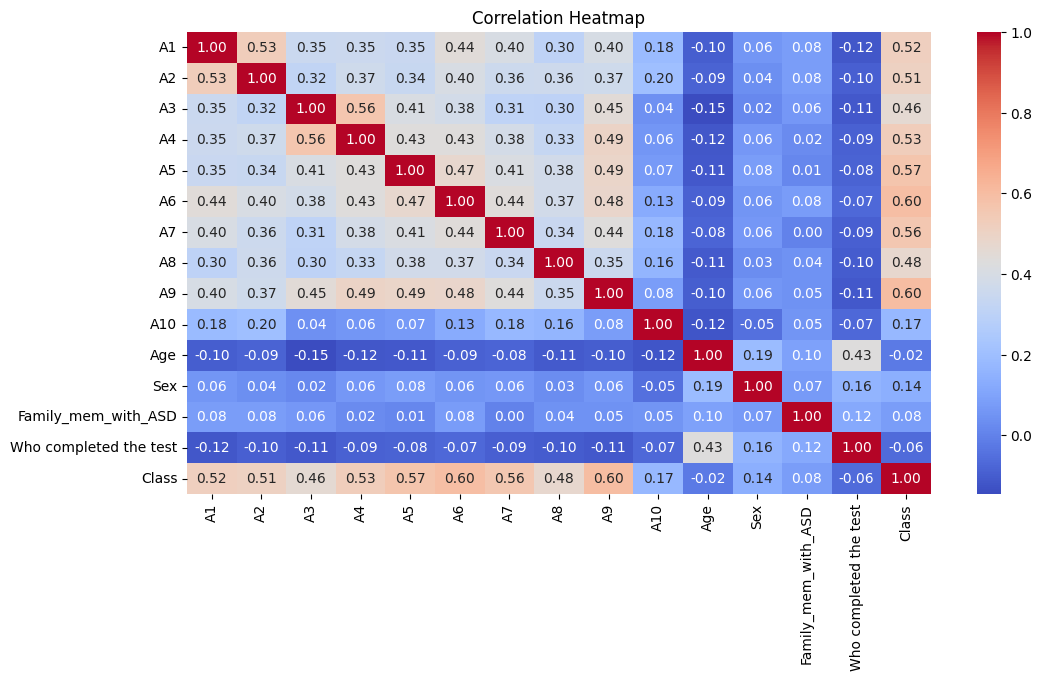

In [16]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

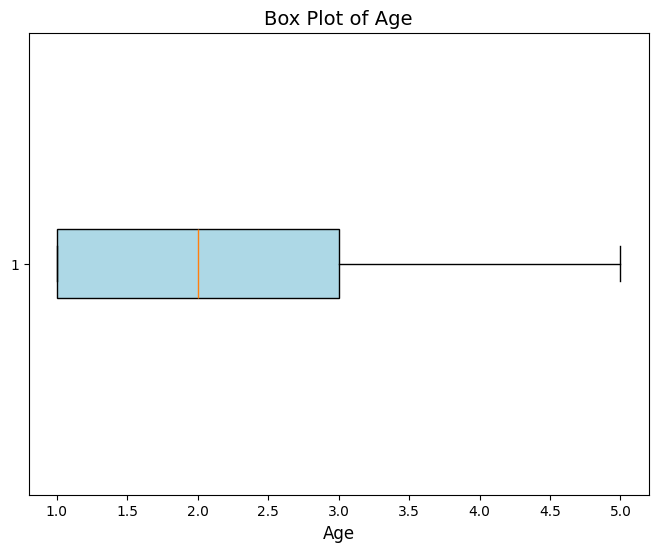

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.show()

In [18]:
def normalizer_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Handing data imbalance
def augment_data(X, y, method='smote'):
  if method == 'smote':
    sampler = SMOTE(random_state=10)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  elif method == 'randomoversampler':
    sampler = RandomOverSampler(random_state=11)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  return X_resampled, y_resampled
def plot_class_distribution(y_train):
  class_distribution = pd.Series(y_train).value_counts()
  plt.figure(figsize=(8, 6))
  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
  plt.title('Class Distribution in Training Data')
  plt.xlabel('Class')
  plt.ylabel('Number of Samples')
  plt.show()

In [19]:
X = df.drop(columns = "Class")
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Training set size: (1820, 14)



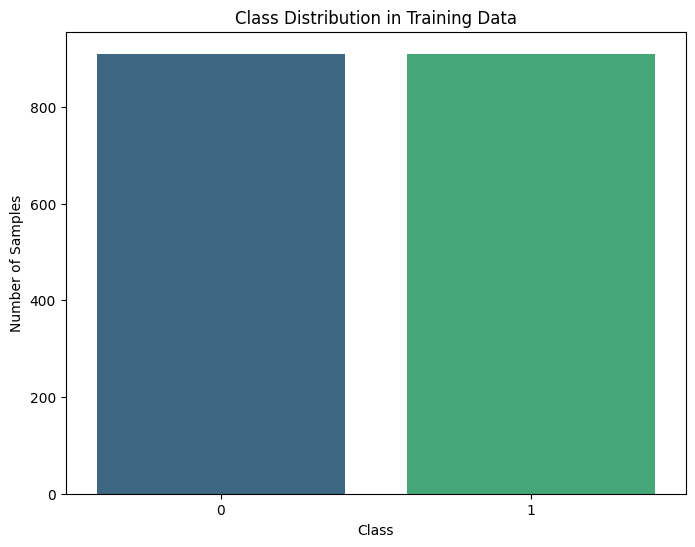

In [20]:
X_train_rov, y_train_rov = augment_data(X_train, y_train, method='randomoversampler')
print(f"Training set size: {X_train_rov.shape}\n")
plot_class_distribution(y_train_rov)

Training set size: (1820, 14)



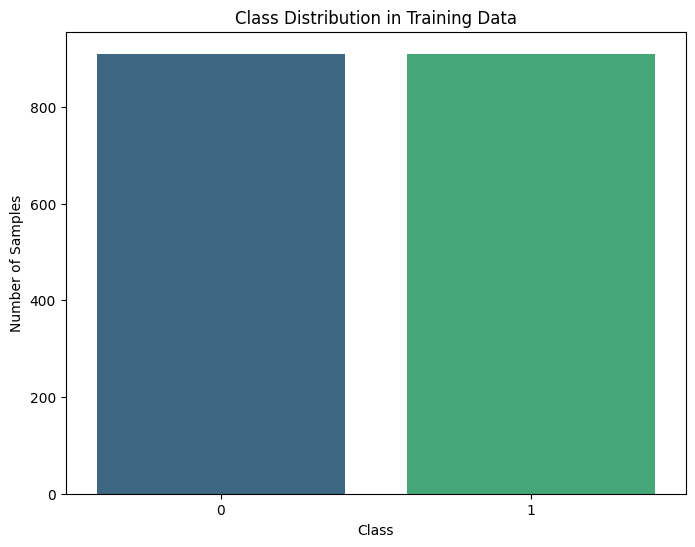

In [21]:
X_train_smote, y_train_smote = augment_data(X_train, y_train, method='smote')

print(f"Training set size: {X_train_smote.shape}\n")
plot_class_distribution(y_train_smote)

In [22]:
def Model_ML(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=False)
    scores = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Training model
        model.fit(X_train, y_train)

        # Predict on the test set of each k-fold
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    print(f"Accuracy on each fold: {scores}")
    print(f"Mean accuracy: {round(sum(scores) / len(scores)*100, 2)}%\n")
    return model

In [23]:
def Gridsearch_params(X, y, model, param_grid, k=5):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=k,  # number of fold
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X, y)
    # Get the best model
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean cross-validation accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")

    return best_model

In [24]:
def evolution_models(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    labels = df['Class'].unique()
    labels = list(labels)

    # Caculater to Confution Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confution matrix heatmap:")
    plt.xlabel("Actual labels")
    plt.ylabel("Predicted labels")
    plt.show()

Accuracy on each fold: [0.967032967032967, 0.9478021978021978, 0.9478021978021978, 0.9478021978021978, 0.8681318681318682]
Mean accuracy: 93.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       194
           1       0.96      0.95      0.96       403

    accuracy                           0.94       597
   macro avg       0.93      0.94      0.93       597
weighted avg       0.94      0.94      0.94       597

------------------------------------------


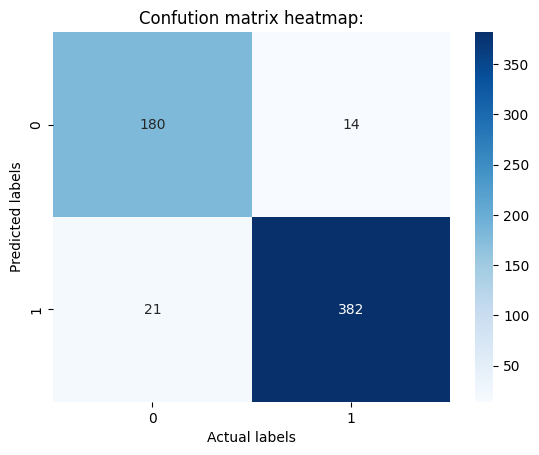

In [25]:
model_logistic = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=1000)
Ros_LR = Model_ML(model_logistic, X_train_rov, y_train_rov)
evolution_models(Ros_LR, X_test, y_test)

Accuracy on each fold: [0.9505494505494505, 0.9395604395604396, 0.945054945054945, 0.945054945054945, 0.9972527472527473]
Mean accuracy: 95.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       194
           1       0.95      0.95      0.95       403

    accuracy                           0.93       597
   macro avg       0.92      0.93      0.93       597
weighted avg       0.93      0.93      0.93       597

------------------------------------------


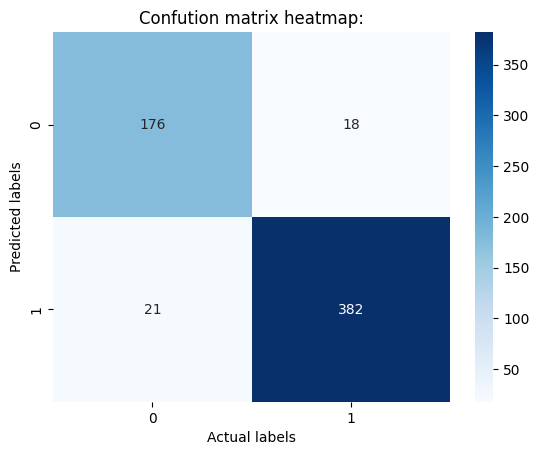

In [26]:
Smote_LR = Model_ML(model_logistic, X_train_smote, y_train_smote)
evolution_models(Smote_LR, X_test, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validation accuracy: 96.59 %

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       194
           1       0.99      0.93      0.96       403

    accuracy                           0.94       597
   macro avg       0.93      0.95      0.94       597
weighted avg       0.95      0.94      0.94       597

------------------------------------------


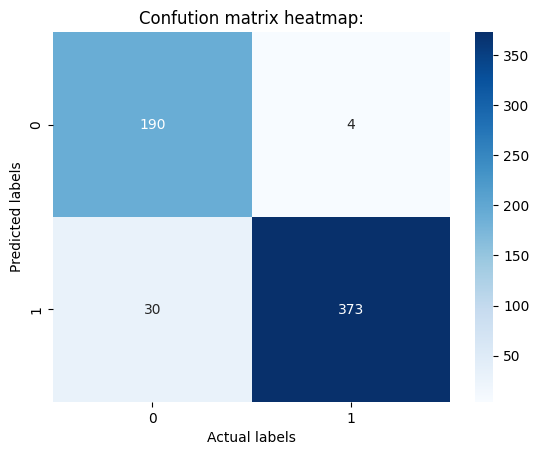

In [27]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear','saga','newton-cg'],
    'max_iter': [500, 1000],
    'class_weight': ['balanced'],
}
log_reg = LogisticRegression()
grid_LR = Gridsearch_params(X_train_rov, y_train_rov, log_reg, params)
evolution_models(grid_LR, X_test, y_test)

Accuracy on each fold: [0.9148351648351648, 0.8791208791208791, 0.8846153846153846, 0.8791208791208791, 0.945054945054945]
Mean accuracy: 90.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       194
           1       0.98      0.90      0.94       403

    accuracy                           0.92       597
   macro avg       0.90      0.93      0.91       597
weighted avg       0.93      0.92      0.92       597

------------------------------------------


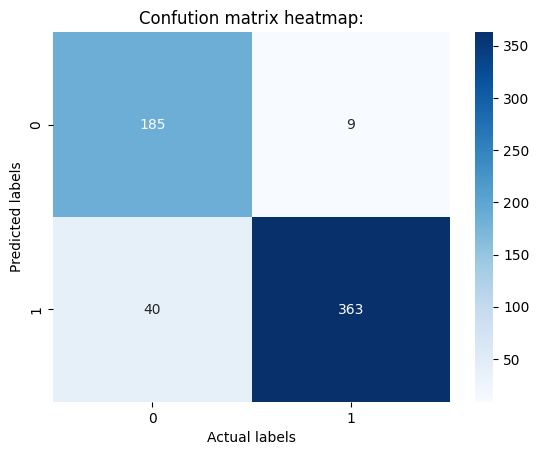

In [28]:
tree_model = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', min_samples_split=5)

# RandomOversampler
Tree = Model_ML(tree_model, X_train_rov, y_train_rov)
evolution_models(Tree, X_test, y_test)

Accuracy on each fold: [0.9148351648351648, 0.8791208791208791, 0.8791208791208791, 0.8791208791208791, 0.945054945054945]
Mean accuracy: 89.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       481
           1       0.97      0.92      0.94       910

    accuracy                           0.93      1391
   macro avg       0.91      0.93      0.92      1391
weighted avg       0.93      0.93      0.93      1391

------------------------------------------


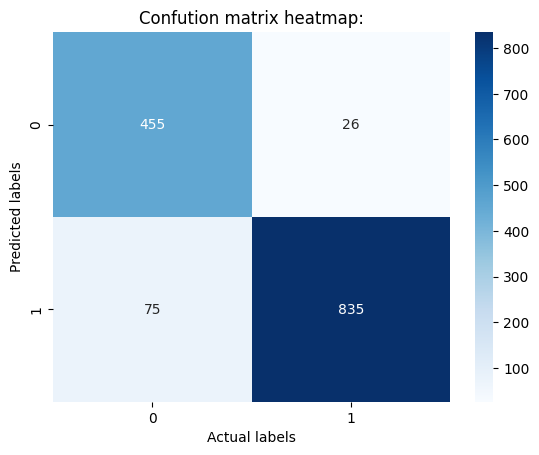

In [29]:
Tree_smote = Model_ML(tree_model, X_train_rov, y_train_rov)
evolution_models(Tree_smote, X_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best parameters found: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best mean cross-validation accuracy: 95.27 %

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       194
           1       0.98      0.92      0.95       403

    accuracy                           0.93       597
   macro avg       0.92      0.94      0.93       597
weighted avg       0.94      0.93      0.93       597

------------------------------------------


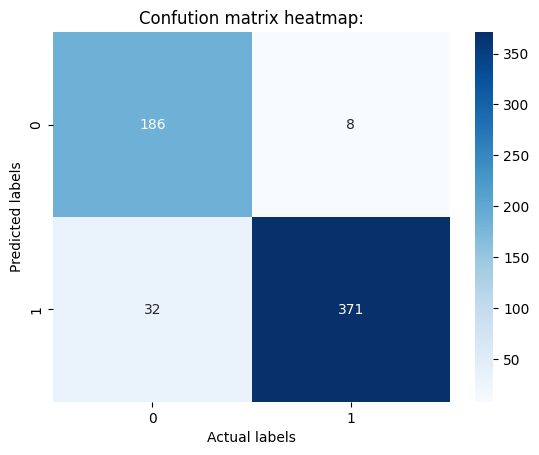

In [30]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for split
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2],  # Complexity pruning parameter
}
dt = DecisionTreeClassifier()
grid_dt = Gridsearch_params(X_train_rov, y_train_rov, dt, param_grid)
evolution_models(grid_dt, X_test, y_test)

Accuracy on each fold: [0.9862637362637363, 0.9862637362637363, 0.9752747252747253, 0.9725274725274725, 0.9807692307692307]
Mean accuracy: 98.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       194
           1       0.98      0.97      0.98       403

    accuracy                           0.97       597
   macro avg       0.96      0.97      0.96       597
weighted avg       0.97      0.97      0.97       597

------------------------------------------


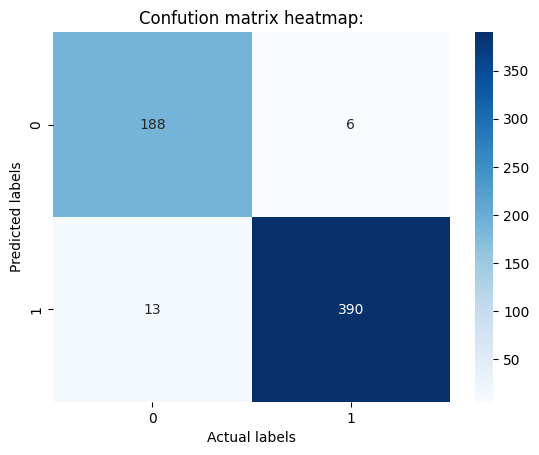

In [31]:
svm_model = SVC(kernel='rbf', C=10)

# RandomOversampler
svm_rov = Model_ML(svm_model, X_train_rov, y_train_rov)
evolution_models(svm_rov, X_test, y_test)

Accuracy on each fold: [0.9807692307692307, 0.9835164835164835, 0.9642857142857143, 0.9697802197802198, 0.9972527472527473]
Mean accuracy: 97.91%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       194
           1       0.99      0.96      0.97       403

    accuracy                           0.97       597
   macro avg       0.96      0.97      0.96       597
weighted avg       0.97      0.97      0.97       597

------------------------------------------


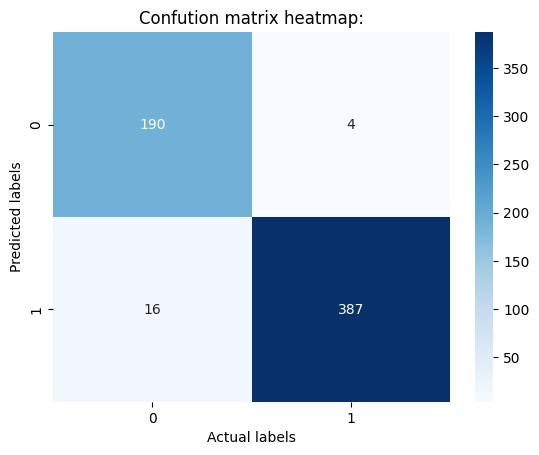

In [32]:
svm_smote = Model_ML(svm_model, X_train_smote, y_train_smote)
evolution_models(svm_smote, X_test, y_test)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best mean cross-validation accuracy: 97.31 %

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       194
           1       0.99      0.95      0.97       403

    accuracy                           0.96       597
   macro avg       0.95      0.97      0.96       597
weighted avg       0.96      0.96      0.96       597

------------------------------------------


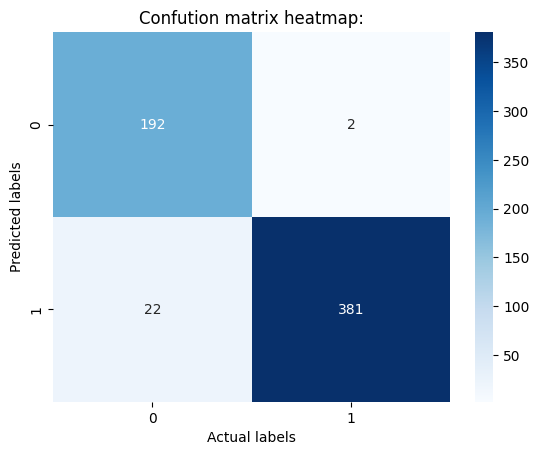

In [33]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1],
    'min_child_weight': [3, 5]
}
xgb = XGBClassifier()

# RandomSampler
xgb_rov = Gridsearch_params(X_train_rov, y_train_rov, xgb, param_grid)
evolution_models(xgb_rov, X_test, y_test)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best mean cross-validation accuracy: 97.42 %

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       194
           1       0.98      0.96      0.97       403

    accuracy                           0.96       597
   macro avg       0.95      0.96      0.95       597
weighted avg       0.96      0.96      0.96       597

------------------------------------------


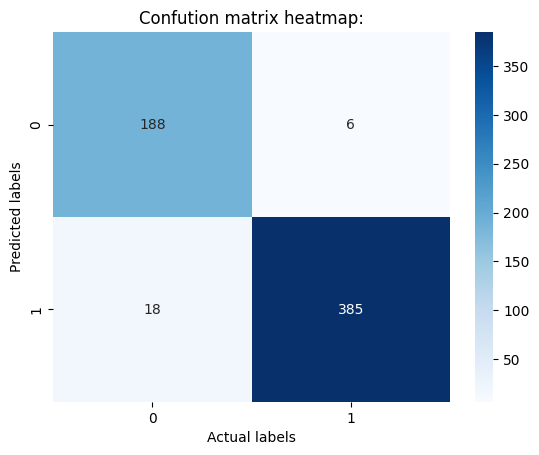

In [34]:
xgb_smote = Gridsearch_params(X_train_smote, y_train_smote, xgb, param_grid)
evolution_models(xgb_smote, X_test, y_test)

Accuracy on each fold: [0.9560439560439561, 0.9340659340659341, 0.9258241758241759, 0.9148351648351648, 0.9615384615384616]
Mean accuracy: 93.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       194
           1       0.97      0.91      0.94       403

    accuracy                           0.92       597
   macro avg       0.90      0.92      0.91       597
weighted avg       0.92      0.92      0.92       597

------------------------------------------


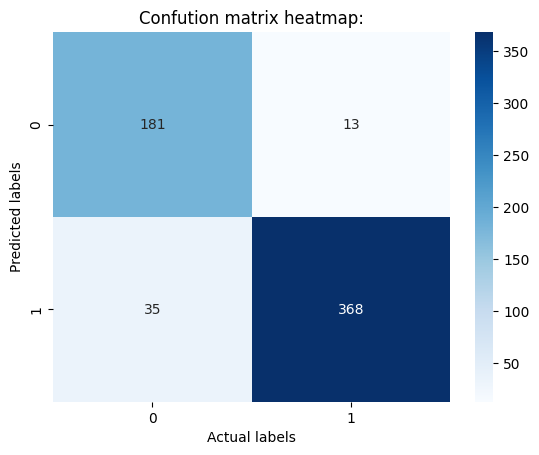

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_rov = Model_ML(knn_model, X_train_rov, y_train_rov)
evolution_models(knn_rov, X_test, y_test)

Accuracy on each fold: [0.9560439560439561, 0.9478021978021978, 0.9258241758241759, 0.9258241758241759, 0.9560439560439561]
Mean accuracy: 94.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       194
           1       0.97      0.92      0.95       403

    accuracy                           0.93       597
   macro avg       0.91      0.93      0.92       597
weighted avg       0.93      0.93      0.93       597

------------------------------------------


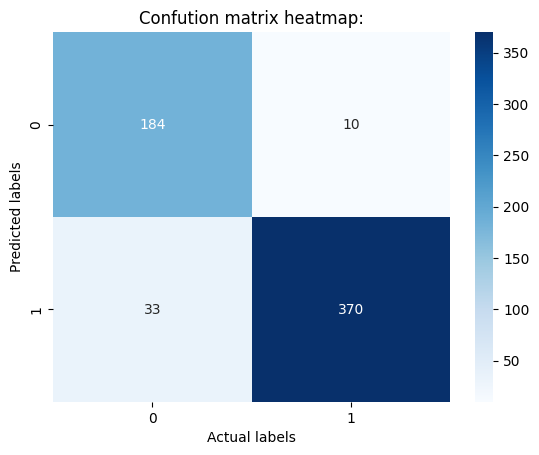

In [36]:
knn_smote = Model_ML(knn_model, X_train_smote, y_train_smote)
evolution_models(knn_smote, X_test, y_test)

In [37]:
voting_clf = VotingClassifier(estimators=[('knn',knn_smote),('svm', svm_rov), ('logreg', grid_LR),('xgb',xgb_rov),('tree',Tree_smote)], voting='hard')
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

Accuracy: 95.30988274706867


In [41]:
flip_percentage = 0.02
num_flips = int(np.floor(flip_percentage * len(df)))

# Randomly select indices for flipping
flip_indices = np.random.choice(df.index, num_flips, replace=False)

# Randomly select new categories from the existing ones
categories = df['Class'].unique()
for idx in flip_indices:
    current_label = df.loc[idx, 'Class']
    new_label = np.random.choice([cat for cat in categories if cat != current_label])  # Pick a different category
    df.loc[idx, 'Class'] = new_label

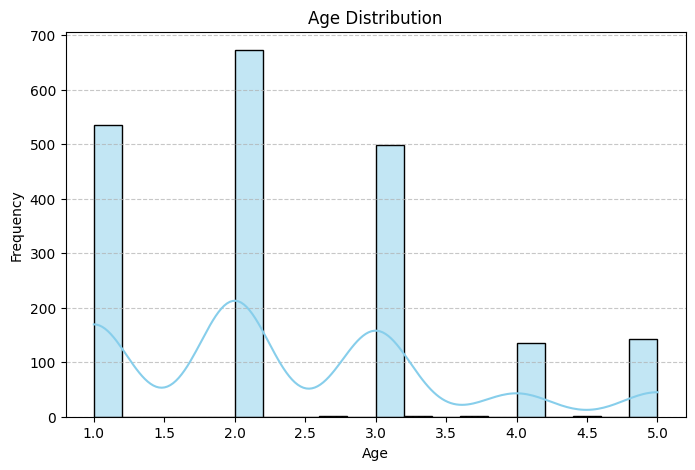

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

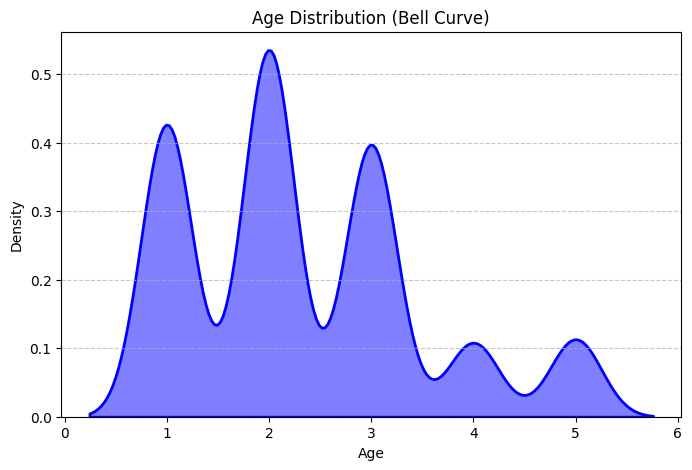

In [43]:
# Plot KDE (Bell Curve)
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Age'], fill=True, color='blue', linewidth=2, alpha=0.5)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution (Bell Curve)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [44]:
columns_to_add = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8','A9','A10']
sum_list = df[columns_to_add].sum(axis=1).tolist()
predict = []
for i in sum_list:
    if i>=4:
        predict.append(1)
    else:
        predict.append(0)
count = 0
actual = df["Class"].tolist()
for i,j in zip(predict,actual):
    if i==j:
        count+=1
print(count)
print(df.shape[0]-count)

1902
86
